In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import helper


In [2]:
#Cargamos dataset
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
#Verificando informacion
print("Informacion:")
print("- Set de Entrenamiento:\t{}".format(len(data.train.labels)))
print("- Set de Prueba:\t{}".format(len(data.test.labels)))
print("- Set de Validacion:\t{}".format(len(data.validation.labels)))

Informacion:
- Set de Entrenamiento:	55000
- Set de Prueba:	10000
- Set de Validacion:	5000


In [4]:
img_size = 28

img_size_flat = img_size * img_size

img_shape = (img_size, img_size)

num_classes = 10

In [5]:
x = tf.placeholder(tf.float32, [None, img_size_flat])


In [6]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [7]:
y_true_cls = tf.placeholder(tf.int64, [None])

In [8]:
#Definimos operaciones de regresion lineal
w = tf.Variable(tf.zeros([img_size_flat, num_classes]))
b = tf.Variable(tf.zeros([ num_classes]))
logits = tf.matmul(x, w) + b

In [9]:
y_pred = tf.nn.softmax(logits)

In [10]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [11]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)

In [12]:
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
session = tf.Session()
session.run(tf.global_variables_initializer())

In [13]:
# bacth de las imagenes
batch_size = 100  

def optimize(num_iterations):
    for i in range(num_iterations):

        x_batch, y_true_batch = data.train.next_batch(batch_size)

        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        session.run(optimizer, feed_dict=feed_dict_train)

In [14]:
data.test.cls = np.argmax(data.test.labels, axis=1)
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [32]:
def imprimir_precision():
    
    acc = session.run(accuracy, feed_dict=feed_dict_test)


    print("Accuracy : {0:.1%}".format(acc))

In [33]:
def matriz_de_confusion():

    cls_true = data.test.cls

    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)


    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predecido')
    plt.ylabel('Verdadero')

In [34]:
def graficar_pesos():

    wi = session.run(w)


    w_min = np.min(wi)
    w_max = np.max(wi)


    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):

        if i<10:
      
            image = wi[:, i].reshape(img_shape)

            ax.set_xlabel("Pesos: {0}".format(i))

            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')


        ax.set_xticks([])
        ax.set_yticks([])

In [35]:
imprimir_precision()

Accuracy : 92.1%


In [36]:
optimize(num_iterations=700)
imprimir_precision()

Accuracy : 92.1%


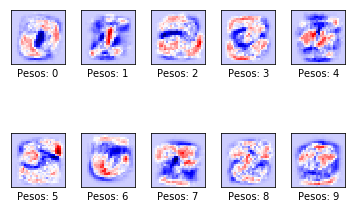

In [37]:
graficar_pesos()

[[ 958    0    3    2    0    6    7    3    1    0]
 [   0 1109    3    2    0    3    4    2   12    0]
 [   6    9  924   17   11    7   16   10   26    6]
 [   4    0   18  900    0   51    2   12   12   11]
 [   1    2    2    1  922    0   11    4    8   31]
 [   8    2    3   20    8  809   15    5   17    5]
 [  11    3    5    1    9   19  906    3    1    0]
 [   1    6   24    6    9    1    0  945    2   34]
 [   5    9    8   22    8   61   11   10  829   11]
 [  11    7    1    9   38   12    0   21    5  905]]


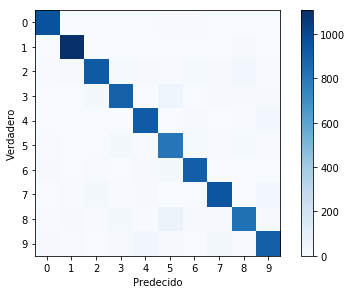

In [38]:
matriz_de_confusion()
